# Data Exploration

In [1]:
import os
os.chdir('..')

In [2]:
from IPython.display import Image, display
from modules import constants
import ipyplot
import seaborn as sns
import polars as pl
import pandas as pd
import numpy as  np

In [3]:
train_metadata = pd.read_csv(constants.train_metadata_path)
test_metadata = pd.read_csv(constants.test_metadata_path)
target_metadata = pd.read_csv(constants.target_name_metadata_path, sep='\t')

train_metadata['path'] = constants.train_images_path + '/' + train_metadata['id'].astype(str) + '.jpeg'
train_metadata

id  WORLDCLIM_BIO1_annual_mean_temperature  \
0      192027691                               12.235703   
1      195542235                               17.270555   
2      196639184                               14.254504   
3      195728812                               18.680834   
4      195251545                                0.673204   
...          ...                                     ...   
55484  190558785                               19.472172   
55485  194523231                               13.724150   
55486  195888987                               14.741204   
55487  135487319                               16.094763   
55488  146608105                               24.559971   

       WORLDCLIM_BIO12_annual_precipitation  \
0                                374.466675   
1                                 90.239998   
2                                902.071411   
3                               1473.933350   
4                                530.088867   
...                                     ...   
55484                            244.795914   
55485                           1450.000000   
55486                            581.866638   
55487                           1180.838135   
55488                           1748.857178   

       WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
0                                              62.524445                       
1                                              10.351111                       
2                                              49.642857                       
3                                             163.100006                       
4                                              50.857777                       
...                                                  ...                       
55484                                          39.127552                       
55485                                         162.260208                       
55486                                         109.231110                       
55487                                          80.176193                       
55488                                         272.821442                       

       WORLDCLIM_BIO15_precipitation_seasonality  \
0                                      72.256844   
1                                      38.220940   
2                                      17.873655   
3                                      45.009758   
4                                      38.230709   
...                                          ...   
55484                                  67.074493   
55485                                  43.139324   
55486                                  89.272148   
55487                                  22.909716   
55488                                  51.363777   

       WORLDCLIM_BIO4_temperature_seasonality  \
0                                  773.592041   
1                                  859.193298   
2                                  387.977753   
3                                  381.053986   
4                                 1323.526855   
...                                       ...   
55484                              472.710358   
55485                              652.716858   
55486                              507.273010   
55487                              342.184021   
55488                               73.158348   

       WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
0                                    33.277779                            125   
1                                    40.009777                            124   
2                                    22.807142                            107   
3                                    20.436666                            120   
4                                    45.891998                             91   
...                                        ...                     

Images are very diverse, with different quality, zoom in and out, different type of plants, fortunately all of them have same size 512x512 which will make data preparation much easier

In [11]:
images = ['../' + os.path.relpath(p, constants.root_path) for p in train_metadata['path'].values]
labels = train_metadata['id'].values

ipyplot.plot_images(images, labels,  max_images=70, img_width=150, show_url=False)

In [68]:
train_metadata.describe()

id  WORLDCLIM_BIO1_annual_mean_temperature  \
count  5.548900e+04                            55489.000000   
mean   1.714553e+08                               14.577142   
std    4.087868e+07                                7.584290   
min    2.637500e+04                              -13.731130   
25%    1.658614e+08                                9.247916   
50%    1.915103e+08                               15.536692   
75%    1.951001e+08                               20.238457   
max    1.967668e+08                               30.294445   

       WORLDCLIM_BIO12_annual_precipitation  \
count                          55489.000000   
mean                            1058.710939   
std                              768.992166   
min                                0.000000   
25%                              528.315552   
50%                              853.776184   
75%                             1352.000000   
max                             8392.463867   

       WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month  \
count                                       55489.000000                       
mean                                          138.164359                       
std                                           136.409312                       
min                                             0.000000                       
25%                                            53.000000                       
50%                                            95.500000                       
75%                                           181.485718                       
max                                          2448.964355                       

       WORLDCLIM_BIO15_precipitation_seasonality  \
count                               55489.000000   
mean                                   56.727213   
std                                    31.692061   
min                                     0.000000   
25%                                    29.685472   
50%                                    50.196312   
75%                                    80.811249   
max                                   169.582291   

       WORLDCLIM_BIO4_temperature_seasonality  \
count                            55489.000000   
mean                               518.711405   
std                                316.618440   
min                                  9.877081   
25%                                300.478760   
50%                                446.522308   
75%                                690.003845   
max                               2025.894653   

       WORLDCLIM_BIO7_temperature_annual_range  SOIL_bdod_0.5cm_mean_0.01_deg  \
count                             55489.000000                   55489.000000   
mean                                 25.227185                     116.895673   
std                                   9.151237                      17.607857   
min                                   7.658674                      29.000000   
25%                                  18.800001                     106.000000   
50%                                  23.681778                     118.000000   
75%                                  30.399998                     130.000000   
max                                  63.657616                     194.000000   

       SOIL_bdod_100.200cm_mean_0.01_deg  SOIL_bdod_15.30cm_mean_0.01_deg  \
count                       55489.000000                     55489.000000   
mean                          140.259205                       128.187695   
std                            15.075214                        16.030602   
min                            46.000000                        42.000000   
25%                           131.000000                       118.000000   
50%                           142.000000                       129.000000   
75%                           150.000000                       139.000000   
max                           192.000000       

Considering there is a big amount of numerical traits, we can start by building a simple model that uses only this to predict, and see the results

In [70]:
for col in train_metadata.columns:
    print(col)

id
WORLDCLIM_BIO1_annual_mean_temperature
WORLDCLIM_BIO12_annual_precipitation
WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month
WORLDCLIM_BIO15_precipitation_seasonality
WORLDCLIM_BIO4_temperature_seasonality
WORLDCLIM_BIO7_temperature_annual_range
SOIL_bdod_0.5cm_mean_0.01_deg
SOIL_bdod_100.200cm_mean_0.01_deg
SOIL_bdod_15.30cm_mean_0.01_deg
SOIL_bdod_30.60cm_mean_0.01_deg
SOIL_bdod_5.15cm_mean_0.01_deg
SOIL_bdod_60.100cm_mean_0.01_deg
SOIL_cec_0.5cm_mean_0.01_deg
SOIL_cec_100.200cm_mean_0.01_deg
SOIL_cec_15.30cm_mean_0.01_deg
SOIL_cec_30.60cm_mean_0.01_deg
SOIL_cec_5.15cm_mean_0.01_deg
SOIL_cec_60.100cm_mean_0.01_deg
SOIL_cfvo_0.5cm_mean_0.01_deg
SOIL_cfvo_100.200cm_mean_0.01_deg
SOIL_cfvo_15.30cm_mean_0.01_deg
SOIL_cfvo_30.60cm_mean_0.01_deg
SOIL_cfvo_5.15cm_mean_0.01_deg
SOIL_cfvo_60.100cm_mean_0.01_deg
SOIL_clay_0.5cm_mean_0.01_deg
SOIL_clay_100.200cm_mean_0.01_deg
SOIL_clay_15.30cm_mean_0.01_deg
SOIL_clay_30.60cm_mean_0.01_deg
SOIL_clay_5.15cm_mean_0.01_deg
S

This are the list of all the features not present in the test data, so basically what we would like to predict, we would only need the mean though, the sd is only available as a data augmentation technique

In [83]:
list(set(train_metadata.columns) - set(test_metadata.columns))

['X11_sd',
 'X50_sd',
 'path',
 'X18_mean',
 'X11_mean',
 'X26_sd',
 'X50_mean',
 'X3112_mean',
 'X3112_sd',
 'X26_mean',
 'X4_mean',
 'X18_sd',
 'X4_sd']

In [4]:
target_vars = list(target_metadata.trait_ID + '_mean')
print('Target vars', target_vars)

Target vars ['X4_mean', 'X11_mean', 'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean']


In [5]:
target_metadata

trait_ID                                        trait_name 
0       X4  Stem specific density (SSD) or wood density (s...
1      X11  Leaf area per leaf dry mass (specific leaf are...
2      X18                                      Plant height 
3      X26                                     Seed dry mass 
4      X50           Leaf nitrogen (N) content per leaf area 
5    X3112  Leaf area (in case of compound leaves: leaf, u...

In [6]:
all_cols = train_metadata.columns
world_climate_vars = list(all_cols[all_cols.str.startswith('WORLDCLIM')])
soil_vars = list(all_cols[all_cols.str.startswith('SOIL')])
modis_vars = list(all_cols[all_cols.str.startswith('MODIS')])
vod_vars = list(all_cols[all_cols.str.startswith('VOD')])
train_vars = world_climate_vars + soil_vars + modis_vars + vod_vars 
train_vars

['WORLDCLIM_BIO1_annual_mean_temperature',
 'WORLDCLIM_BIO12_annual_precipitation',
 'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
 'WORLDCLIM_BIO15_precipitation_seasonality',
 'WORLDCLIM_BIO4_temperature_seasonality',
 'WORLDCLIM_BIO7_temperature_annual_range',
 'SOIL_bdod_0.5cm_mean_0.01_deg',
 'SOIL_bdod_100.200cm_mean_0.01_deg',
 'SOIL_bdod_15.30cm_mean_0.01_deg',
 'SOIL_bdod_30.60cm_mean_0.01_deg',
 'SOIL_bdod_5.15cm_mean_0.01_deg',
 'SOIL_bdod_60.100cm_mean_0.01_deg',
 'SOIL_cec_0.5cm_mean_0.01_deg',
 'SOIL_cec_100.200cm_mean_0.01_deg',
 'SOIL_cec_15.30cm_mean_0.01_deg',
 'SOIL_cec_30.60cm_mean_0.01_deg',
 'SOIL_cec_5.15cm_mean_0.01_deg',
 'SOIL_cec_60.100cm_mean_0.01_deg',
 'SOIL_cfvo_0.5cm_mean_0.01_deg',
 'SOIL_cfvo_100.200cm_mean_0.01_deg',
 'SOIL_cfvo_15.30cm_mean_0.01_deg',
 'SOIL_cfvo_30.60cm_mean_0.01_deg',
 'SOIL_cfvo_5.15cm_mean_0.01_deg',
 'SOIL_cfvo_60.100cm_mean_0.01_deg',
 'SOIL_clay_0.5cm_mean_0.01_deg',
 'SOIL_clay_100.200cm_mean_0.01_d

In [7]:
corr = train_metadata[target_vars + train_vars].corr().iloc[0:6, :]
corr.style.background_gradient(cmap='coolwarm')

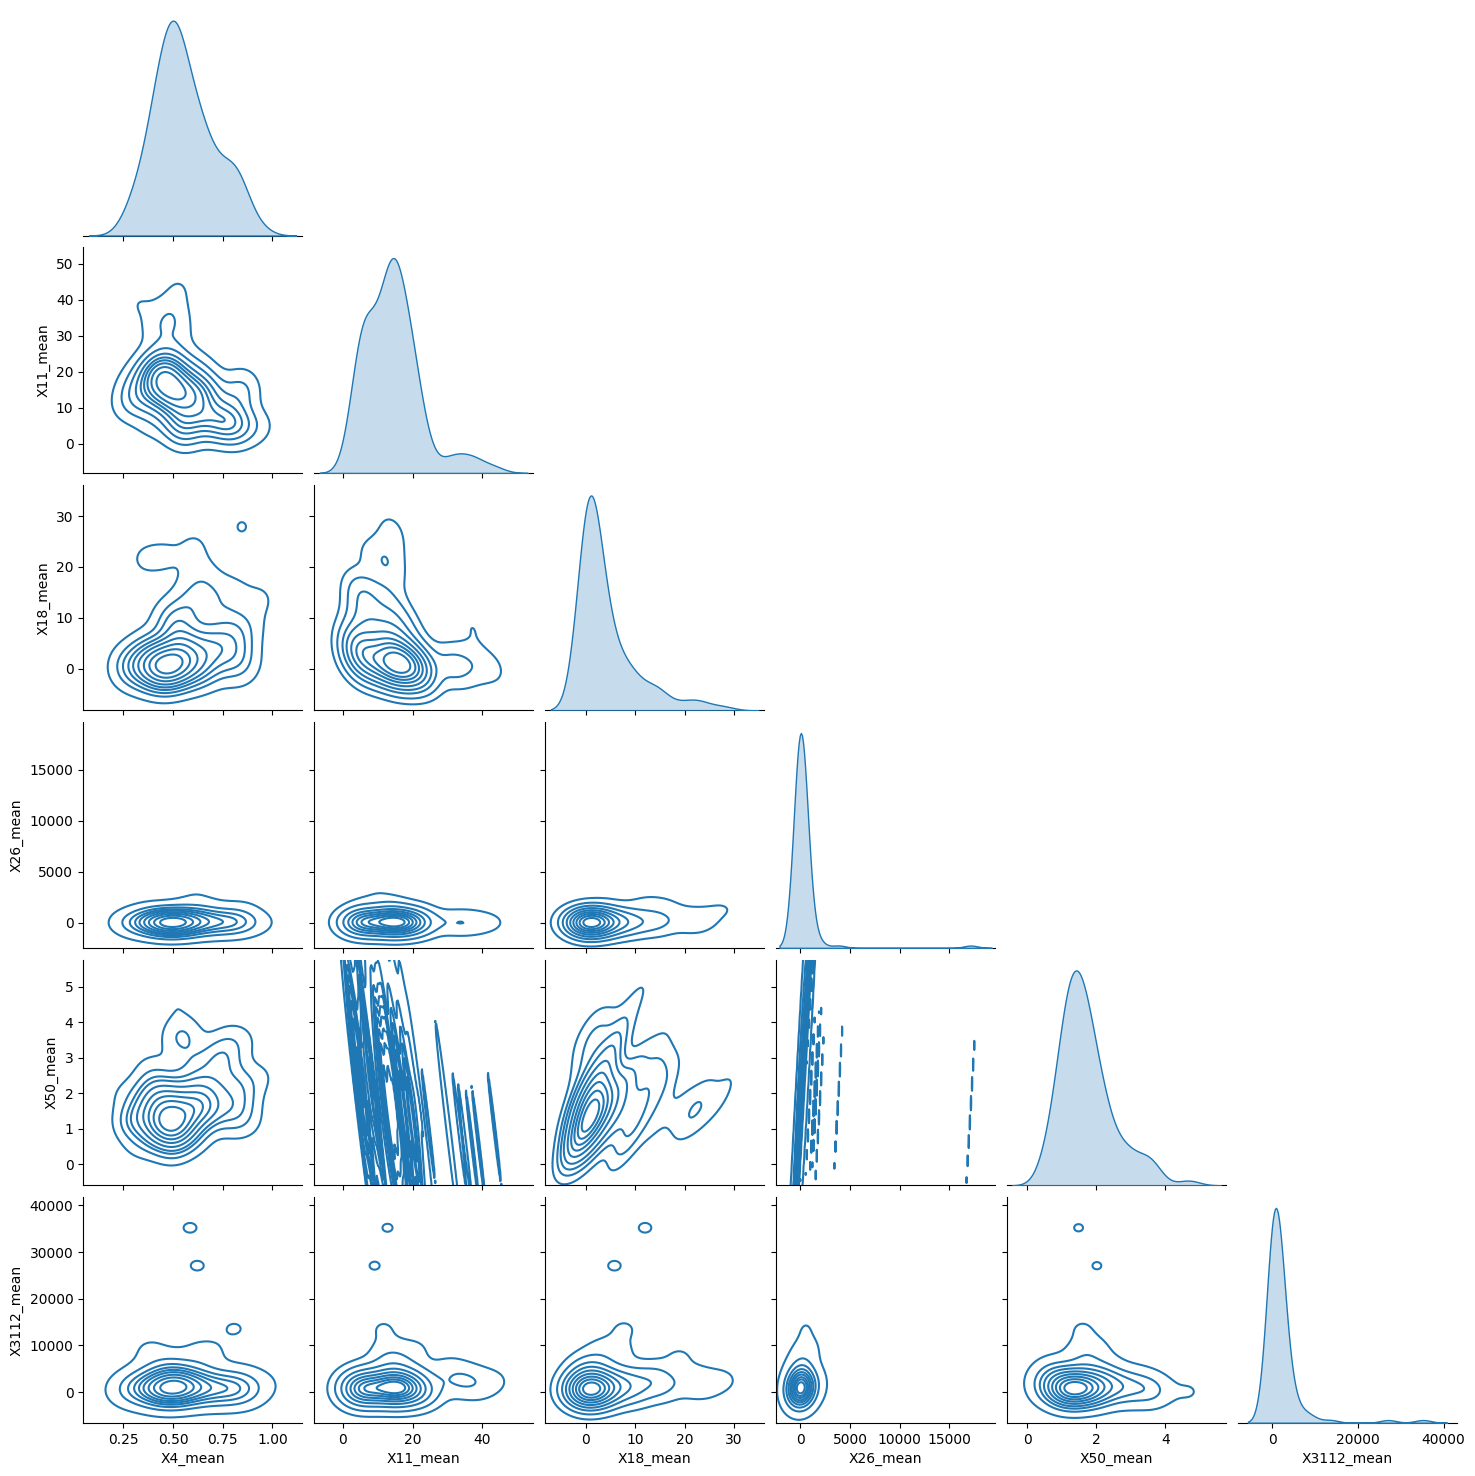

In [9]:
sns.pairplot(train_metadata[target_vars].head(100),  corner=True, kind="kde")